In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def sabr_volatility(F, K, T, alpha, beta, rho, nu):
    """
    Calculate the SABR model implied volatility.

    Parameters:
    F : float
        Forward rate of the underlying.
    K : float
        Strike price.
    T : float
        Time to maturity.
    alpha : float
        Volatility of the forward rate at the start.
    beta : float
        Elasticity parameter of the SABR model.
    rho : float
        Correlation between the forward rate and its volatility.
    nu : float
        Volatility of volatility.

    Returns:
    float
        Implied volatility from the SABR model.
    """
    # Avoid division by zero and log of zero
    if F == K:
        FK_beta = (F * K) ** ((1 - beta) / 2)
        z = nu / alpha * FK_beta * np.log(F / K)
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z ** 2) + z - rho) / (1 - rho))
    else:
        FK_beta = (F * K) ** ((1 - beta) / 2)
        z = nu / alpha * FK_beta * np.log(F / K)
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z ** 2) + z - rho) / (1 - rho))

    sigma = (alpha / (FK_beta * (1 + ((1 - beta) ** 2 / 24) * np.log(F / K) ** 2 + 
             ((1 - beta) ** 4 / 1920) * np.log(F / K) ** 4))) * (z / x_z)

    return sigma

def black_formula(F, K, sigma, T, is_call=True):
    """
    Black's formula for pricing European options on futures.

    Parameters:
    F : float
        Forward rate of the underlying.
    K : float
        Strike price.
    sigma : float
        Implied volatility.
    T : float
        Time to maturity.
    is_call : bool
        True if the option is a call, False if it is a put.

    Returns:
    float
        The price of the call/put option using Black's formula.
    """
    d1 = (np.log(F / K) + 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if is_call:
        price = np.exp(-T) * (F * norm.cdf(d1) - K * norm.cdf(d2))
    else:
        price = np.exp(-T) * (K * norm.cdf(-d2) - F * norm.cdf(-d1))
    
    return price


In [7]:
T=10

# 10Y 1Y
f_1Y = 0.2938
sigma_1Y = 5.3399
p_1Y = black_formula(f_1Y, f_1Y, sigma_1Y, T, is_call=True)

# 10Y 2Y
f_2Y = 0.2976
sigma_2Y = 5.3311
p_2Y = black_formula(f_2Y, f_2Y, sigma_2Y, T, is_call=True)

# 10Y 3Y
f_3Y = 0.2996
sigma_3Y = 5.2101
p_3Y = black_formula(f_3Y, f_3Y, sigma_3Y, T, is_call=True)

# 10Y 5Y
f_5Y = 0.2992
sigma_5Y = 5.0614 
p_5Y = black_formula(f_5Y, f_5Y, sigma_5Y, T, is_call=True)

# 10Y 7Y
f_7Y = 0.2943 
sigma_7Y = 4.9531 
p_7Y = black_formula(f_7Y, f_7Y, sigma_7Y, T, is_call=True)

# 10Y 10Y
f_10Y = 0.2840
sigma_10Y = 4.8315
p_10Y = black_formula(f_10Y, f_10Y, sigma_10Y, T, is_call=True)

# 10Y 12Y
f_12Y = 0.2763
sigma_12Y = 4.6781
p_12Y = black_formula(f_12Y, f_12Y, sigma_12Y, T, is_call=True)

# 10Y 15Y
f_15Y = 0.2654
sigma_15Y = 4.5247
p_15Y = black_formula(f_15Y, f_15Y, sigma_15Y, T, is_call=True)

# 10Y 20Y
f_20Y = 0.2517
sigma_20Y = 4.3559
p_20Y = black_formula(f_20Y, f_20Y, sigma_20Y, T, is_call=True)

# 10Y 30Y
f_30Y = 0.2340
sigma_30Y = 4.1757
p_30Y = black_formula(f_30Y, f_30Y, sigma_30Y, T, is_call=True)


1.333849936421805e-05
1.3511019097315492e-05
1.3601818956840459e-05
1.3583658984935454e-05
1.3361199329099228e-05
1.2893580052545414e-05
1.2544000593372813e-05
1.204914135895334e-05
1.1427162321152451e-05
1.0623583563991563e-05


In [8]:
price =np.array([p_1Y, p_2Y, p_3Y, p_5Y, p_7Y, p_10Y, p_12Y, p_15Y, p_20Y, p_30Y ])*10000



In [9]:
tenors = ['1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '12Y', '15Y', '20Y', '30Y']


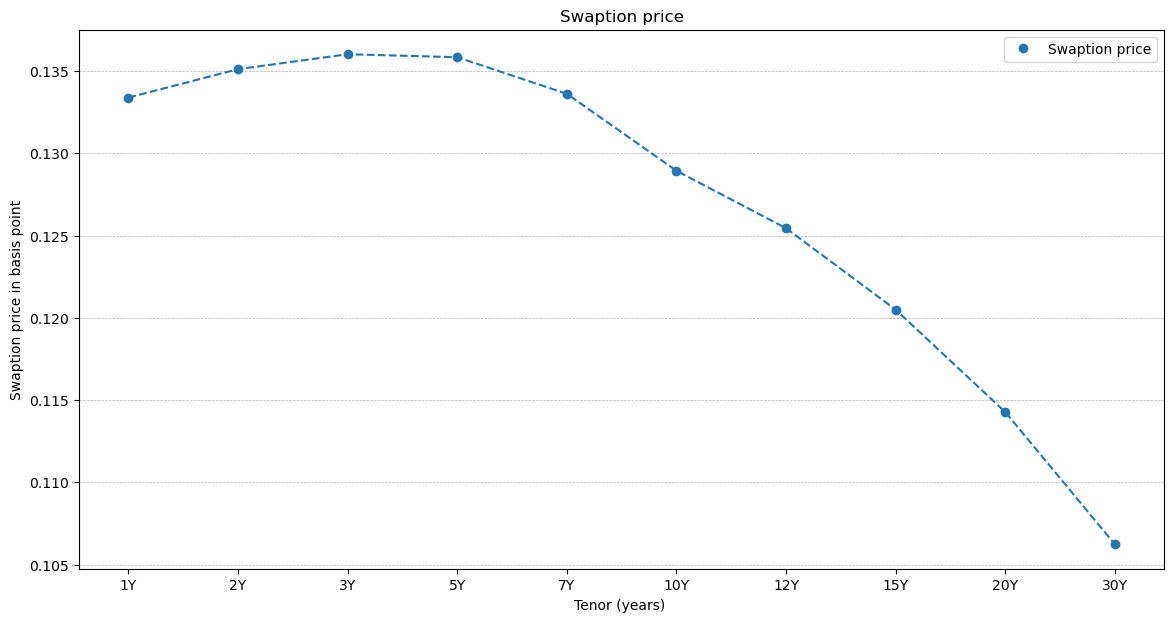

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(tenors, price,  linestyle='--', color = 'tab:blue')
plt.plot(tenors, price, 'o', label ='Swaption price')
plt.xlabel('Tenor (years) ')
plt.ylabel('Swaption price in basis point')
plt.title('Swaption price')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/swaption_price_atm.png")
plt.show()
plt.close()